## EDA & Data Visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in grouped cupid data
#cupid_religion = pd.read_pickle('data/cupid_religion.pkl')

cupid_df = pd.read_pickle('data/grouped_cupid.pkl')

In [3]:
cupid_df.head(3)

,age,sex,orientation,body_type,diet,drinks,drugs,offspring,pets,religion,smokes
0,22,m,straight,average,anything,sometimes,no,"doesn't have kid(s), but wants kid(s)",likes dogs and cats,agnosticism,sometimes
1,35,m,straight,average,other,yes,sometimes,"doesn't have kid(s), but wants kid(s)",likes dogs and cats,doesn't matter,no
2,38,m,straight,thin,anything,sometimes,no,doesn't have kids,likes cats,doesn't matter,no


---

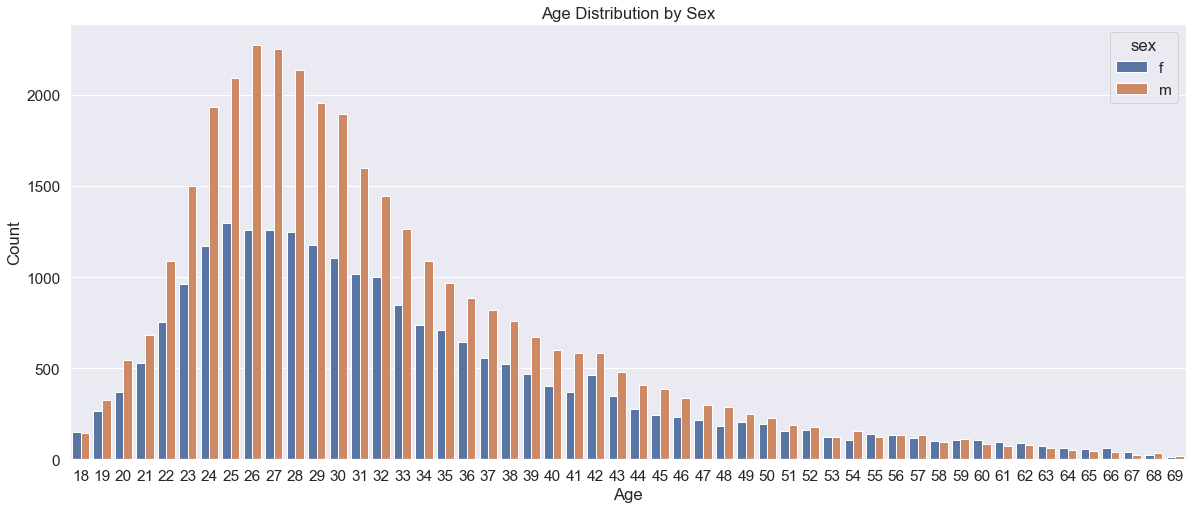

In [7]:
# count of age by sex

plt.figure(figsize = (20,8))
sns.set(font_scale = 1.4)
sns.countplot(x = 'age', data = cupid_df, hue = 'sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Sex');

- The most popular age is 26, with most ages being from approx. 24 - 30
- More men are on the dating app than women (60% vs 40%)
- 50% more men are on the dating app than women (~35k vs. 23k)
- There are more older women on the app than men (~ ages 55+)

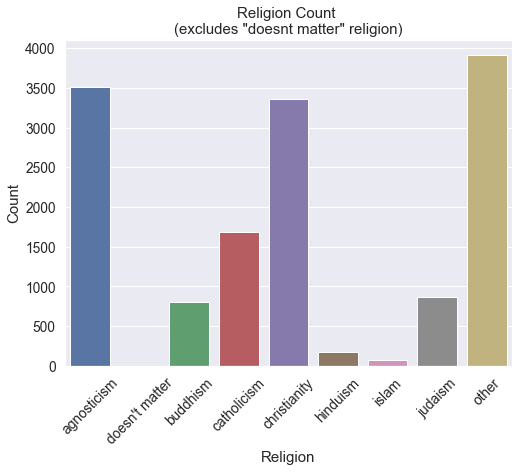

In [4]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'religion', data = cupid_df[(cupid_df['religion'] != "doesn't matter")])
sns.set(font_scale = 1.25)
plt.xlabel('Religion')
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.title('Religion Count \n(excludes "doesnt matter" religion)');

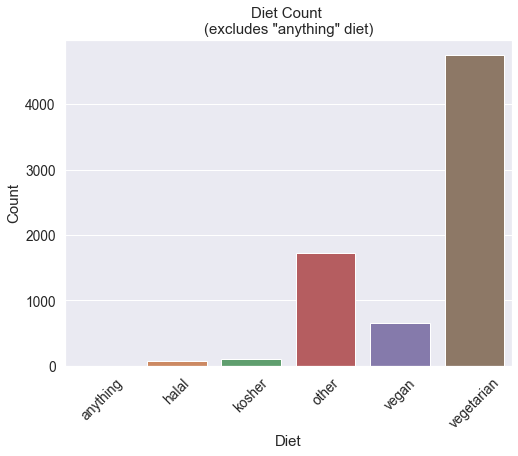

In [5]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'diet', data = cupid_df[(cupid_df['diet'] != "anything")])
sns.set(font_scale = 1.25)
plt.xlabel('Diet')
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.title('Diet Count \n(excludes "anything" diet)');

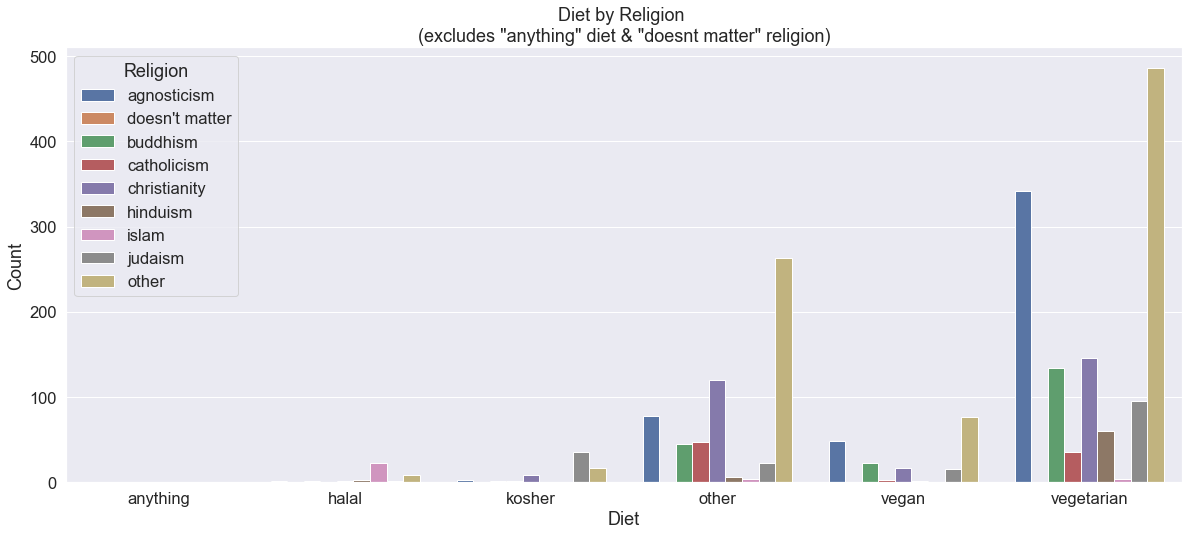

In [6]:
# excluded "anything" and "doesn't matter" to see the other diets closer

plt.figure(figsize = (20,8))
sns.set(font_scale = 1.5)
sns.countplot(x = 'diet', data = cupid_df[(cupid_df['diet'] != 'anything') & (cupid_df['religion'] != "doesn't matter")], hue = 'religion')
plt.xlabel('Diet')
plt.ylabel('Count')
plt.title('Diet by Religion \n(excludes "anything" diet & "doesnt matter" religion)')
plt.legend(loc = 'upper left').set_title('Religion');

- Majority of religions follow a meat-less (vegetarian + vegan) diet. This makes sense, since a lot of the religions are unable to eat meat, for example (i.e. Halal, Judaism, Buddhism), unless prepared a specific way
- Hala diet is mostly for the Islam religion
- Kosher diet is mostly for the Judaism religion
- Buddhism and Hinduism religions follows a vegetarian diet the most
- Aside from those who's diet consists of "anything", the data consists mostly of "vegetarian" diets
- Not as many 'halal' or 'kisher' diets, which would affect the recommendations based on cosine similarity
- Aside from those where religion doesn't matter, the data contains mostly 'agnosticism', 'christianity', and 'other' religions
- Not as many 'hinduism' or 'islam' religions, which would affect the recommendations, since "religion" would be a criteria included in the modeling that determines the recommendations

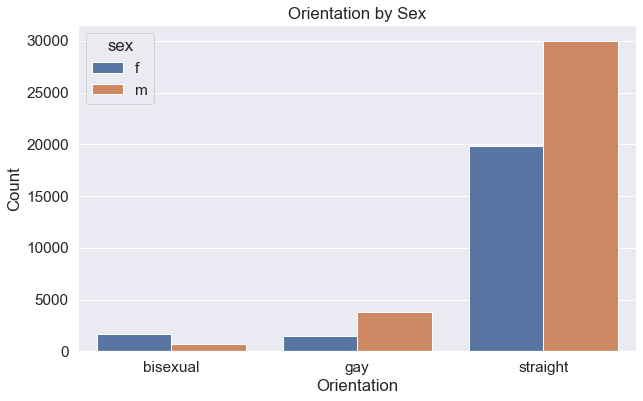

In [17]:
# excluding "sometimes" drinks so that we can get a closer look at just "yes" + "no" data points

plt.figure(figsize = (10,6))
sns.set(font_scale = 1.4)
sns.countplot(x = 'orientation', data = cupid_df, hue = 'sex')
plt.xlabel('Orientation')
plt.ylabel('Count')
plt.title('Orientation by Sex');

- Majority of the orientation in the data is 'straight'
- Lack of 'bisexual' and 'gay' data points would affect the recommendations returned, especially if their religion and/or diet is niche (bisexual female, hinduism religion, halal diet)

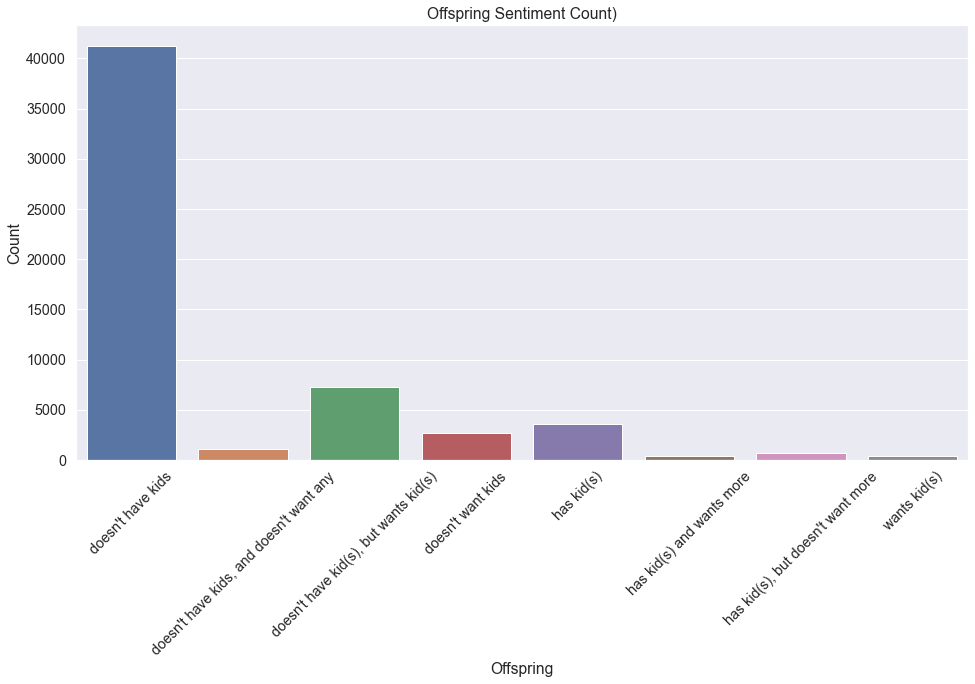

In [21]:
plt.figure(figsize = (16,8))
sns.set(font_scale = 1.3)
sns.countplot(x = 'offspring', data = cupid_df)
plt.xlabel('Offspring')
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.title('Offspring Sentiment Count)');

- Excluded "sometimes" drinking habits to have a closer look at just the "yes" and "no" responses
- Initially, I predicted that more of the people who have kids drank more than what's represented in the graphs, as a lifestlye stress reliever
- Despite majority of the data being that of people who don't have kids, it makes sense why more of them drink, as they don't have to devote time to kids

In [22]:
cupid_df.shape

(57473, 11)